# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


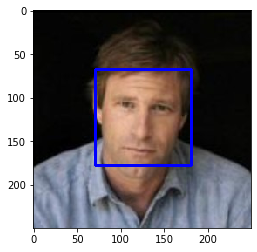

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

Human faces were detected with a 98% accuracy. And dogs were incorrectly detected as human 17% of the time.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

num_hum = 0
num_dog = 0

for image in human_files_short:
    if face_detector(image) == True:
        num_hum += 1

for image in dog_files_short:
    if face_detector(image) == True:
        num_dog += 1
        
print('Number of humans detected as human:')
print(num_hum)
print('Number of dogs detected as human:')
print(num_dog)


Number of humans detected as human:
96
Number of dogs detected as human:
18


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
from PIL import ImageFile
import torchvision.transforms as transforms

ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = process_image(img_path)
    image = torch.FloatTensor(image)
    image = image.unsqueeze_(0)
    
    #check for Cuda
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        image = image.to('cuda')
    
    #Predict
    output = VGG16(image)
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

    return preds # predicted class index

In [8]:
#Not sure if this matters but the code in this cell I wrote for a project in a prior Udacity class.

def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    #opens the images based on the passed in file path
    pil_image = Image.open(image)
    image_width, image_height = pil_image.size
   
    #resizes the image
    size = (256, 256)
    pil_image.thumbnail(size, Image.ANTIALIAS)
    
    #Crops the image
    box = find_center_crop_coords(pil_image)
    pil_image = pil_image.crop(box)

    
    #adjusts the color channels
    np_image = np.array(pil_image)
    np_image = np_image / 256
    
    #normalize the image
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std
    
    #switch color channel
    np_image = np.transpose(np_image, (2,0,1))
    
    return np_image

def find_center_crop_coords(image):
    awidth, aheight = image.size
    bwidth, bheight = (224, 224)
    l = (awidth - bwidth)/2
    t = (aheight - bheight)/2
    r = (awidth + bwidth)/2
    b = (aheight + bheight)/2
    return (l,t,r,b)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    if (pred > 150) and (pred < 269):
        return True
    else:
        return False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

99% of human images were correctly not considered dogs,
100% of the dog images were classifed as dogs


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
num_hum = 0
num_dog = 0

for image in human_files_short:
    if dog_detector(image) == False:
        num_hum += 1

for image in dog_files_short:
    if dog_detector(image) == True:
        num_dog += 1
        
print('Number of humans detected as dogs:')
print(num_hum)
print('Number of dogs detected as dogs:')
print(num_dog)

Number of humans detected as dogs:
100
Number of dogs detected as dogs:
96


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

num_workers = 0
batch_size = 100

'''
data_transform = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])


data_transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Resize((224,224)
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])
'''

train_transforms = transforms.Compose([transforms.Resize(size=258),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(30),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

validTest_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406], 
                                                                [0.229, 0.224, 0.225])])


#load in training, validation & test sets
train_data = datasets.ImageFolder(root="data/dog_images/train", transform=train_transforms)
valid_data = datasets.ImageFolder(root="data/dog_images/valid", transform=validTest_transforms)
test_data = datasets.ImageFolder(root="data/dog_images/test", transform=validTest_transforms)

#setup data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20, num_workers=num_workers)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}


In [13]:
print(len(train_data))

6680


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # convolutional layer
        #Takes in a 224x224x3 image
        self.conv1 = nn.Conv2d(3, 64, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(256, 512, 3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(512, 1024, 3, stride=1, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Linear Layer
        self.fc1 = nn.Linear((1024 * 7 * 7), 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 133)
        #dropout
        self.dropout = nn.Dropout(0.5) 
        
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        # add dropout layer
        x = self.dropout(x)
        # flatten image input
        x = x.view(-1, (1024 * 7 * 7))
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add 3rd hidden layer, with relu activation function
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [15]:
"""
Initial Model is based on lessons

-------------------------------------
First run only 1% accuracy, as my images larger decided to add more layers and inmcrease depth. 
2,2 pool and 3 filter as they seam to be common standards more somthing you only switch nwhen you have reason 2

Epoch: 24 	Training Loss: 4.873946 	Validation Loss: 4.869378
Validation loss decreased (4.870217 --> 4.869378).  Saving model ...
Epoch: 25 	Training Loss: 4.656981 	Validation Loss: 5.657132

Model 2
 # convolutional layer
        #Takes in a 224x224x3 image
        self.conv1 = nn.Conv2d(3, 20, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(20, 40, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(40, 80, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(80, 160, 3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(160, 320, 3, stride=1, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Linear Layer
        self.fc1 = nn.Linear(320 * 7 * 7, 800)
        self.fc2 = nn.Linear(800, 400)
        self.fc3 = nn.Linear(400, 133)
        #dropout
        self.dropout = nn.Dropout(0.25) 
        
--------------------------------------------------------

Model 3

reduced the complexity of the fc layers

#Takes in a 224x224x3 image
        self.conv1 = nn.Conv2d(3, 20, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(20, 40, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(40, 80, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(80, 160, 3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(160, 320, 3, stride=1, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Linear Layer
        self.fc1 = nn.Linear(320 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 133)
        #dropout
        self.dropout = nn.Dropout(0.25)
        
------------------------------
Model 4 dramaticaly upped the deapth on the conv layers to see affect, 64 -> 1024 across the 5

--------------------------------

Model 5 as the final depth of 1024 is rather large I decided to try and lower the last 
layer to stay at 512. I am leaveind said layer in order for the maxpool to get the size down to 7x7.
This model was massivly overfitting so my hope is this fix will start to combat that.

--------
Model 6
Tried to adjust the fc as the last model against larger over fitting

------
Model 7 test a relu on the 2nd FC layer

------------

Model 8

looked at vgg16 paper and tried to adjust learning rate to .001 and dropout to .5

--------------------

Not a new model but adjusted the impage processing, mostly from the vgg paper and some of other random model I looked at online

-------------------

Adjusted preprossing and still nothing, getting numbers no where near that of the models I was compareing to. 
Turns out I missudnerstood batch/LR/epoch ratio size so due to the small size my models were getting under trained....

-----------------------------------

Started to run into memory errors had to make further batch adjustments

-----------------------------------

Decided to try a diffrent optim (Adam) which has made a huge diffrence

----------------------------------------

Thr third Linear FC layer made a bigg differnce in the speed at which the train/valid loss improved

----------------------------------------
20% 
self.conv1 = nn.Conv2d(3, 64, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(256, 512, 3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(512, 1024, 3, stride=1, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Linear Layer
        self.fc1 = nn.Linear((1024 * 7 * 7), 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        #dropout
        self.dropout = nn.Dropout(0.5) 
        
------------------------------------

# max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Linear Layer
        self.fc1 = nn.Linear((1024 * 7 * 7), 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 133)
        #dropout
        self.dropout = nn.Dropout(0.5) 
        
-------------------------

Added a dropout after the convol layers to help against over fitting

"""

'\nInitial Model is based on lessons\n\n-------------------------------------\nFirst run only 1% accuracy, as my images larger decided to add more layers and inmcrease depth. \n2,2 pool and 3 filter as they seam to be common standards more somthing you only switch nwhen you have reason 2\n\nEpoch: 24 \tTraining Loss: 4.873946 \tValidation Loss: 4.869378\nValidation loss decreased (4.870217 --> 4.869378).  Saving model ...\nEpoch: 25 \tTraining Loss: 4.656981 \tValidation Loss: 5.657132\n\nModel 2\n # convolutional layer\n        #Takes in a 224x224x3 image\n        self.conv1 = nn.Conv2d(3, 20, 3, stride=1, padding=1)\n        self.conv2 = nn.Conv2d(20, 40, 3, stride=1, padding=1)\n        self.conv3 = nn.Conv2d(40, 80, 3, stride=1, padding=1)\n        self.conv4 = nn.Conv2d(80, 160, 3, stride=1, padding=1)\n        self.conv5 = nn.Conv2d(160, 320, 3, stride=1, padding=1)\n        \n        # max pooling layer\n        self.pool = nn.MaxPool2d(2, 2)\n        # Linear Layer\n        sel

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

-Started with CNN created during the lessons as a working baseline

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            #Clear gradients
            optimizer.zero_grad()

            #forward pass - train
            output = model(data)
            
            #calculate batch loss - train
            loss = criterion(output, target)
            
            #backward pass
            loss.backward()
            
            #preform optimization
            optimizer.step()
            
            #update train loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            #forward pass - valid
            with torch.no_grad():
                output = model(data)
            
            #calculate batch loss - valid
            loss = criterion(output, target)
            
            #update valid loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            #train_loss = train_loss/len(loaders['train'].dataset)
            #valid_loss = valid_loss/len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
            
    # return trained model
    return model

In [18]:
# train the model
model_scratch = train(120, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.899004 	Validation Loss: 4.870381
Validation loss decreased (inf --> 4.870381).  Saving model ...
Epoch: 2 	Training Loss: 4.846985 	Validation Loss: 4.720182
Validation loss decreased (4.870381 --> 4.720182).  Saving model ...
Epoch: 3 	Training Loss: 4.693679 	Validation Loss: 4.600882
Validation loss decreased (4.720182 --> 4.600882).  Saving model ...
Epoch: 4 	Training Loss: 4.626987 	Validation Loss: 4.563792
Validation loss decreased (4.600882 --> 4.563792).  Saving model ...
Epoch: 5 	Training Loss: 4.558284 	Validation Loss: 4.503928
Validation loss decreased (4.563792 --> 4.503928).  Saving model ...
Epoch: 6 	Training Loss: 4.471259 	Validation Loss: 4.374244
Validation loss decreased (4.503928 --> 4.374244).  Saving model ...
Epoch: 7 	Training Loss: 4.379359 	Validation Loss: 4.317881
Validation loss decreased (4.374244 --> 4.317881).  Saving model ...
Epoch: 8 	Training Loss: 4.287189 	Validation Loss: 4.253013
Validation loss decreased (4.31788

Epoch: 82 	Training Loss: 1.981241 	Validation Loss: 2.631013
Epoch: 83 	Training Loss: 1.948674 	Validation Loss: 2.600522
Epoch: 84 	Training Loss: 1.916551 	Validation Loss: 2.581932
Epoch: 85 	Training Loss: 1.946221 	Validation Loss: 2.593128
Epoch: 86 	Training Loss: 1.894686 	Validation Loss: 2.591629
Epoch: 87 	Training Loss: 1.899605 	Validation Loss: 2.691686
Epoch: 88 	Training Loss: 1.897614 	Validation Loss: 2.609676
Epoch: 89 	Training Loss: 1.847970 	Validation Loss: 2.692016
Epoch: 90 	Training Loss: 1.839519 	Validation Loss: 2.597801
Epoch: 91 	Training Loss: 1.867419 	Validation Loss: 2.542143
Validation loss decreased (2.542450 --> 2.542143).  Saving model ...
Epoch: 92 	Training Loss: 1.804340 	Validation Loss: 2.632393
Epoch: 93 	Training Loss: 1.871102 	Validation Loss: 2.604047
Epoch: 94 	Training Loss: 1.829796 	Validation Loss: 2.626941
Epoch: 95 	Training Loss: 1.843410 	Validation Loss: 2.555447
Epoch: 96 	Training Loss: 1.796740 	Validation Loss: 2.659008
E

In [19]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [21]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.482929


Test Accuracy: 37% (311/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders

num_workers = 0
batch_size = 100

train_transforms = transforms.Compose([transforms.Resize(size=258),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(30),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

validTest_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406], 
                                                                [0.229, 0.224, 0.225])])


#load in training, validation & test sets
train_data = datasets.ImageFolder(root="data/dog_images/train", transform=train_transforms)
valid_data = datasets.ImageFolder(root="data/dog_images/valid", transform=validTest_transforms)
test_data = datasets.ImageFolder(root="data/dog_images/test", transform=validTest_transforms)

#setup data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20, num_workers=num_workers)

loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

# define VGG16 model
model_transfer = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

In [24]:
# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

In [25]:
#printing the un-edited model, as I want to maintain most of the original classifers structure. Just add to it.
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [26]:
n_inputs = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_inputs, 133)
model_transfer.classifier[6] = last_layer

# move model to GPU if CUDA is available
if use_cuda:
    model_transfer = model_transfer.cuda()

In [27]:
'''
First model based on trasnfer lesson,

last_layer = nn.Linear(n_inputs, 133)
model_transfer.classifier[6] = last_layer

Test Accuracy: 60% (507/836)

--------------------------------------------

Second model I decided to add a second lair and see the affects of training a whole new classifer added on the vgg16 model

'''

'\nFirst model based on trasnfer lesson,\n\nlast_layer = nn.Linear(n_inputs, 133)\nmodel_transfer.classifier[6] = last_layer\n\nTest Accuracy: 60% (507/836)\n\n--------------------------------------------\n\nSecond model I decided to add a second lair and see the affects of training a whole new classifer added on the vgg16 model\n\n'

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [29]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 4.853655 	Validation Loss: 4.475694
Validation loss decreased (inf --> 4.475694).  Saving model ...
Epoch: 2 	Training Loss: 4.434097 	Validation Loss: 4.032221
Validation loss decreased (4.475694 --> 4.032221).  Saving model ...
Epoch: 3 	Training Loss: 4.033181 	Validation Loss: 3.565713
Validation loss decreased (4.032221 --> 3.565713).  Saving model ...
Epoch: 4 	Training Loss: 3.600676 	Validation Loss: 3.075159
Validation loss decreased (3.565713 --> 3.075159).  Saving model ...
Epoch: 5 	Training Loss: 3.172971 	Validation Loss: 2.596612
Validation loss decreased (3.075159 --> 2.596612).  Saving model ...
Epoch: 6 	Training Loss: 2.741230 	Validation Loss: 2.114931
Validation loss decreased (2.596612 --> 2.114931).  Saving model ...
Epoch: 7 	Training Loss: 2.371051 	Validation Loss: 1.764380
Validation loss decreased (2.114931 --> 1.764380).  Saving model ...
Epoch: 8 	Training Loss: 2.068123 	Validation Loss: 1.474996
Validation loss decreased (1.76438

In [30]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [31]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.625345


Test Accuracy: 83% (696/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [35]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = process_image(img_path)
    image = torch.FloatTensor(image)
    image = image.unsqueeze_(0)
    
    # Move tensor to GPU if available
    if use_cuda:
        image = image.cuda()
       
    #toss model in eval mode
    model_transfer.eval()
    
    with torch.no_grad():
        output = model_transfer(image)
        prediction = torch.argmax(output).item()
     
    return class_names[prediction]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [40]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        human_or_dog = ' human!'
        breed = predict_breed_transfer(img_path)
    elif dog_detector(img_path):
        human_or_dog = ' dog!'
        breed = predict_breed_transfer(img_path)
    else:
        human_or_dog = 'well I am not sure what you are...'
        breed =  'well again, nothing I am aware of'
    
    plt.imshow(Image.open(img_path))
    plt.show()
    print('Hello! I think you are a {} '.format(human_or_dog))
    print('You look like a {}'.format(breed))
    print('\n\n\n')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

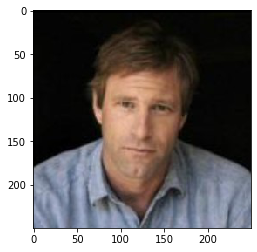

Hello! I think you are a  human! 
You look like a Chinese crested






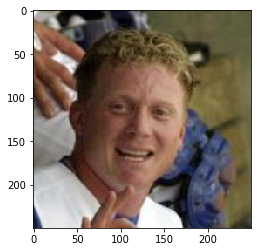

Hello! I think you are a  human! 
You look like a Brittany






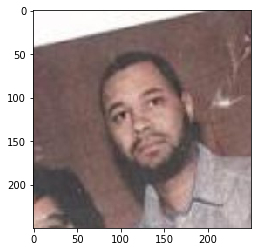

Hello! I think you are a well I am not sure what you are... 
You look like a well again, nothing I am aware of






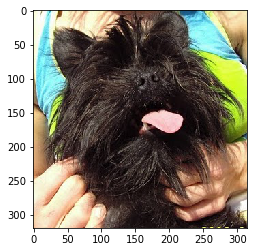

Hello! I think you are a  dog! 
You look like a Affenpinscher






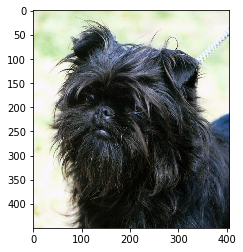

Hello! I think you are a  dog! 
You look like a Affenpinscher






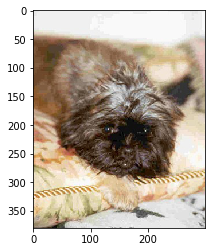

Hello! I think you are a  dog! 
You look like a Affenpinscher






In [41]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)